In [1]:
#Exploratory Data Analysis

In [2]:
import pandas as pd
import os.path
from os import path
import os
import numpy as np
import requests
from pathlib import Path
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import datetime

print(pd.__version__)

if path.exists('./raw_data.csv'):
    data = pd.read_csv('./raw_data.csv')
    data['hour'] = data['date'].astype('datetime64[ns]').dt.hour
    display(data)
    print (data.size)

1.2.5


,site,battery_power,site_power,solar_power,date,hour
0,134a3fa6,-1158.00,484.48,1194.36,2021-07-02 17:34:24+00:00,17
1,8d9fed87,-3461.67,1222.92,3499.83,2021-07-02 17:34:25+00:00,17
2,5688ed10,-1.67,-1389.69,1786.21,2021-07-02 17:34:25+00:00,17
3,2b33a48d,NaN,NaN,NaN,2021-07-02 17:34:26+00:00,17
4,07333ad0,-10.00,-5543.65,8171.82,2021-07-02 17:34:26+00:00,17
...,...,...,...,...,...,...
85858,eec02ec5,-7512.33,-9.71,8749.80,2021-07-04 17:22:58+00:00,17
85859,90791ae9,NaN,NaN,NaN,2021-07-04 17:22:59+00:00,17
85860,49b6c0dd,-9.83,42.00,-1609.37,2021-07-04 17:22:59+00:00,17
85861,d0926969,NaN,-824.38,3812.74,2021-07-04 17:22:59+00:00,17


515178


In [3]:
from utils import get_box_plot_data



In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85863 entries, 0 to 85862
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   site           85863 non-null  object 
 1   battery_power  74165 non-null  float64
 2   site_power     73244 non-null  float64
 3   solar_power    73246 non-null  float64
 4   date           85863 non-null  object 
 5   hour           85863 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 3.9+ MB


In [5]:
data.shape

(85863, 6)

In [6]:
data.head()

,site,battery_power,site_power,solar_power,date,hour
0,134a3fa6,-1158.00,484.48,1194.36,2021-07-02 17:34:24+00:00,17
1,8d9fed87,-3461.67,1222.92,3499.83,2021-07-02 17:34:25+00:00,17
2,5688ed10,-1.67,-1389.69,1786.21,2021-07-02 17:34:25+00:00,17
3,2b33a48d,NaN,NaN,NaN,2021-07-02 17:34:26+00:00,17
4,07333ad0,-10.00,-5543.65,8171.82,2021-07-02 17:34:26+00:00,17


In [7]:
data.tail()

,site,battery_power,site_power,solar_power,date,hour
85858,eec02ec5,-7512.33,-9.71,8749.80,2021-07-04 17:22:58+00:00,17
85859,90791ae9,NaN,NaN,NaN,2021-07-04 17:22:59+00:00,17
85860,49b6c0dd,-9.83,42.00,-1609.37,2021-07-04 17:22:59+00:00,17
85861,d0926969,NaN,-824.38,3812.74,2021-07-04 17:22:59+00:00,17
85862,7435e9d3,-1200.00,9.83,2031.82,2021-07-04 17:23:00+00:00,17


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,74165.0,-92.827524,1471.200527,-10398.33,-10.00,0.000,7.8300,9710.67
site_power,73244.0,44.826389,2193.721615,-15048.05,-13.24,29.590,736.4050,15207.37
solar_power,73246.0,1439.925494,2578.050785,-5223.73,1.63,11.985,2483.8725,16371.42
hour,85863.0,12.140806,6.658917,0.00,7.00,12.000,18.0000,23.00


In [9]:
sites = data.site.unique()
print(sites)

['134a3fa6' '8d9fed87' '5688ed10' '2b33a48d' '07333ad0' '38c8ae33'
 'adc42b19' 'e9ba8cec' 'e12c2148' '4b78aae6' 'e724ca65' '135433c1'
 '90606897' '02ebf5c7' 'c8eb2d3d' '2b98cbdd' '39146e59' '55af2f9b'
 '28731623' '3193e230' 'e6bcf7cf' '7da0acb7' 'c18b6195' '20abb173'
 'f34b386a' 'f7f9ac09' '5fc96249' '82c74b9e' 'b255f7ad' '61bff705'
 '619fd2b9' '260f359a' '4faff963' '499a251d' 'dfc6fdf5' '64e1616f'
 '93c8a2c1' 'eec02ec5' '90791ae9' '49b6c0dd' 'd0926969' '7435e9d3']


In [10]:
from utils import *

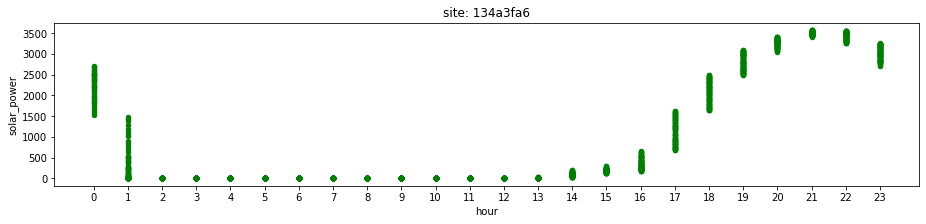

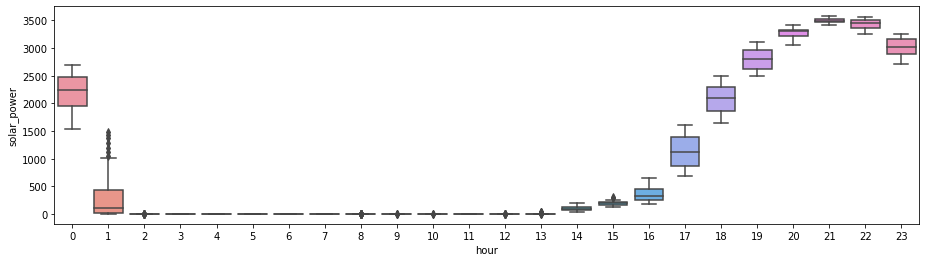

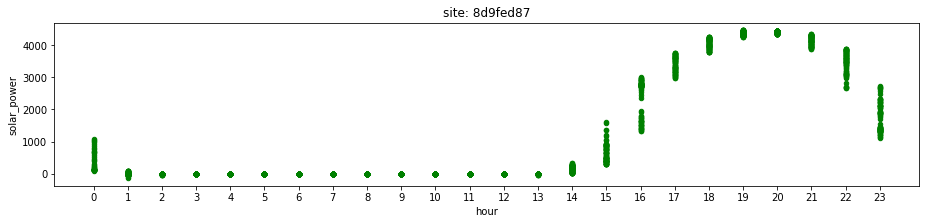

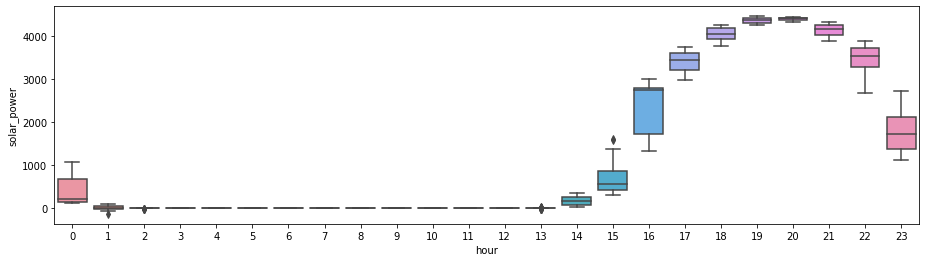

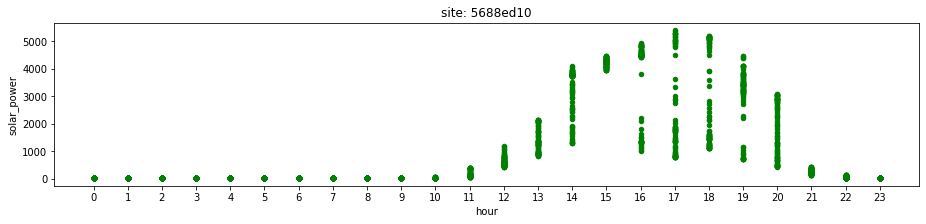

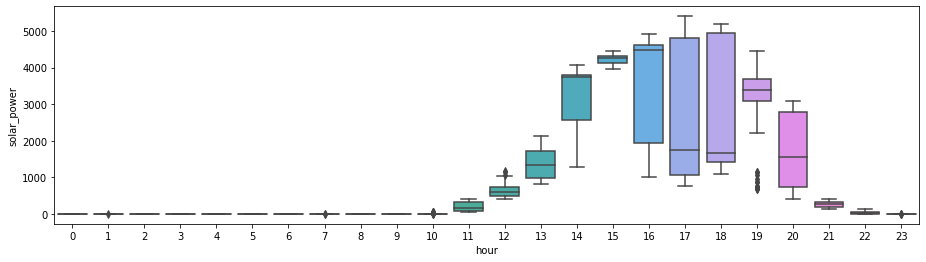

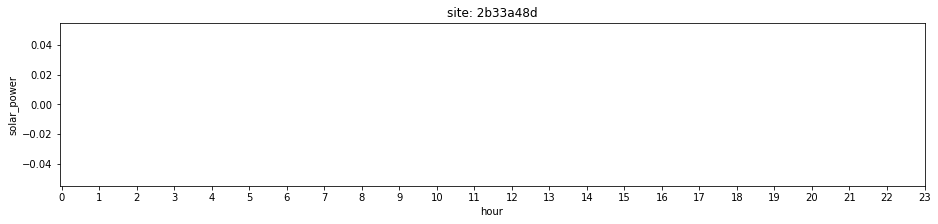

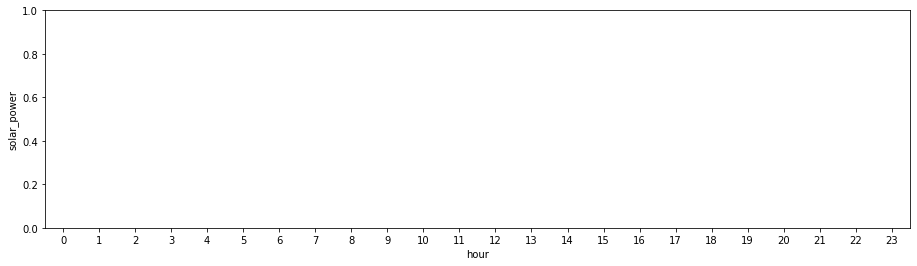

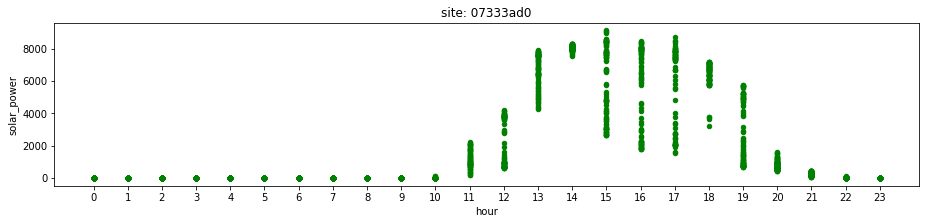

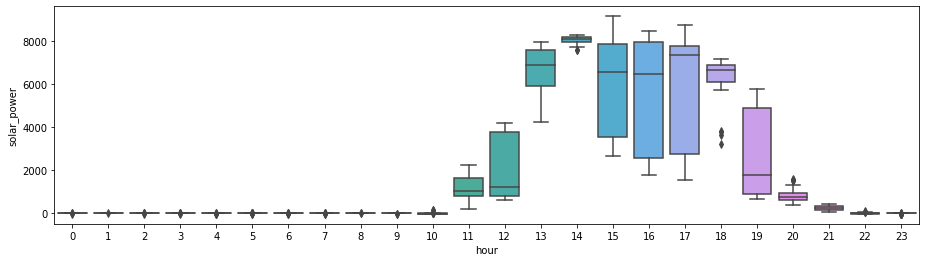

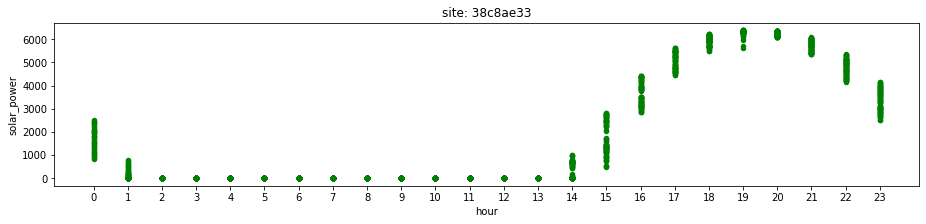

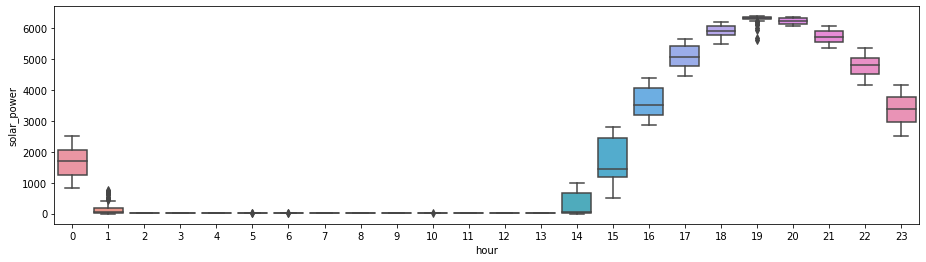

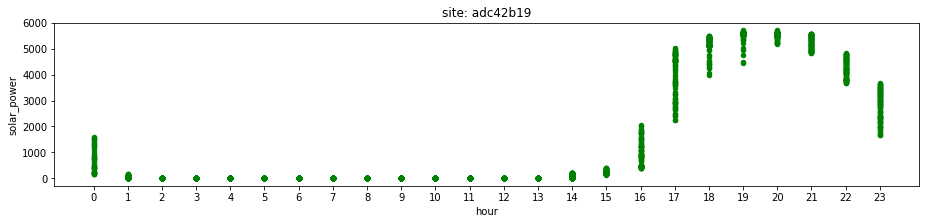

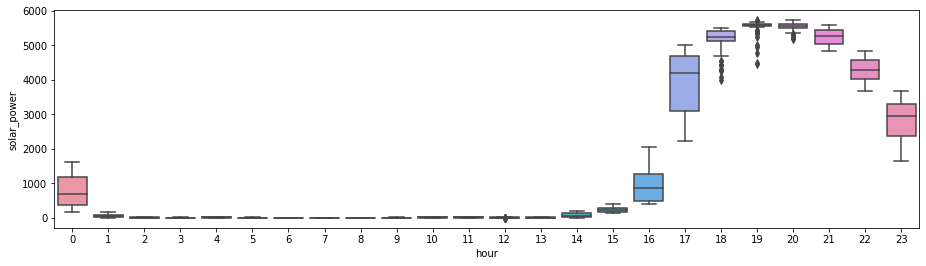

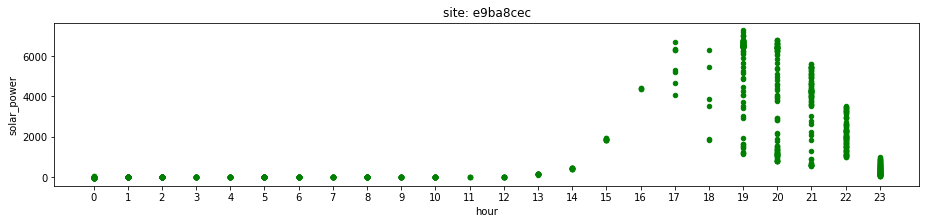

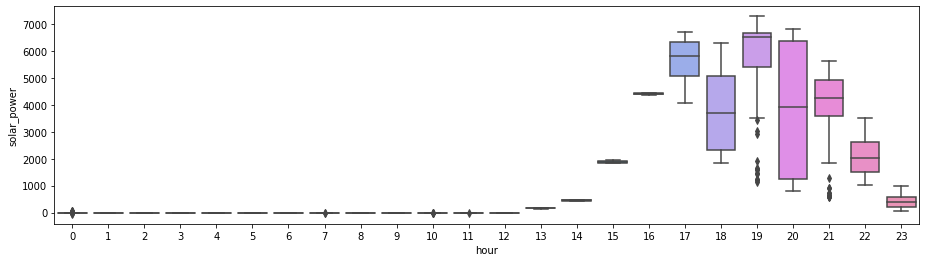

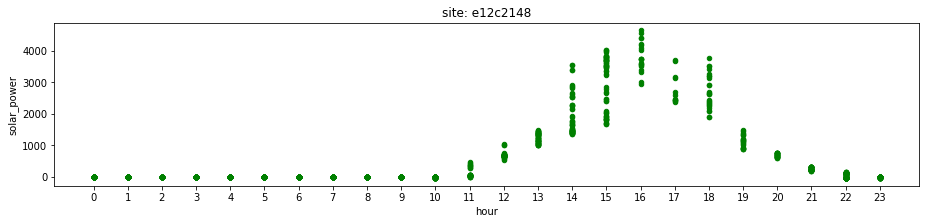

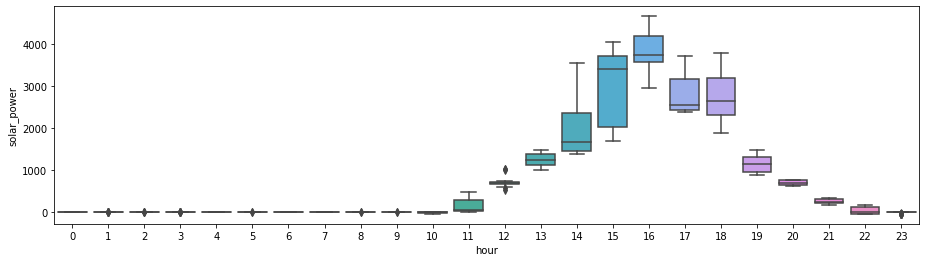

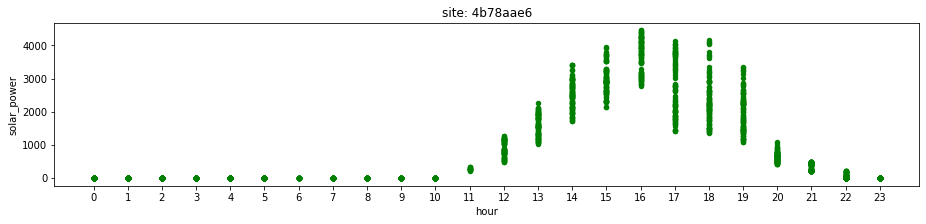

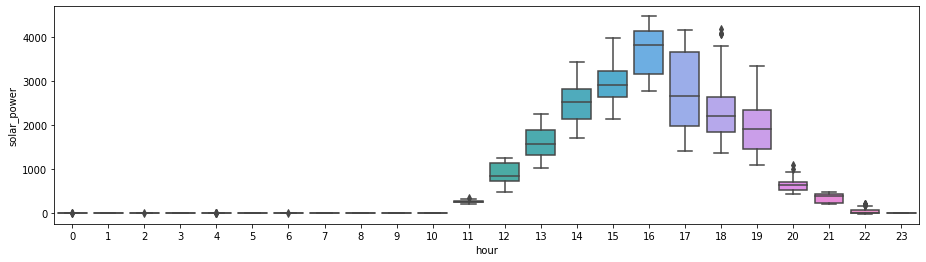

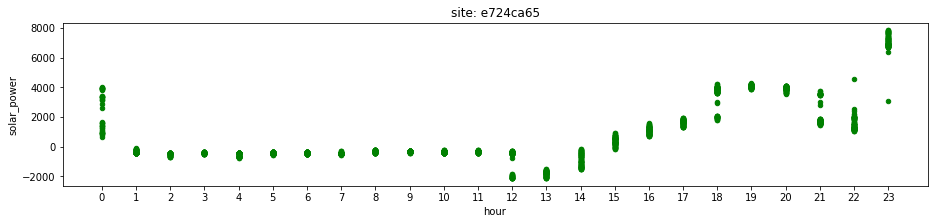

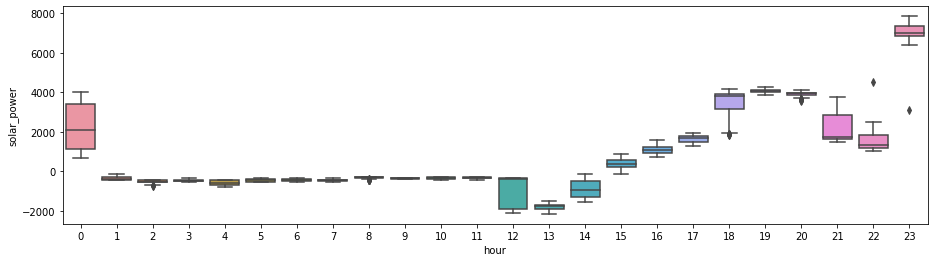

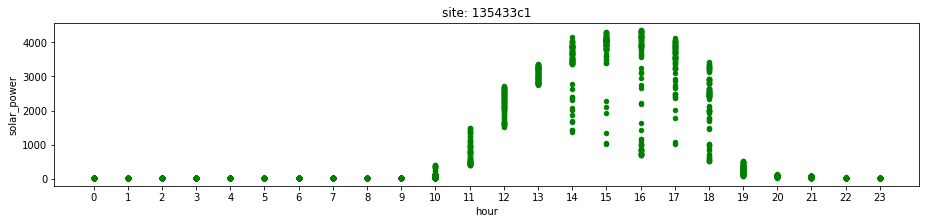

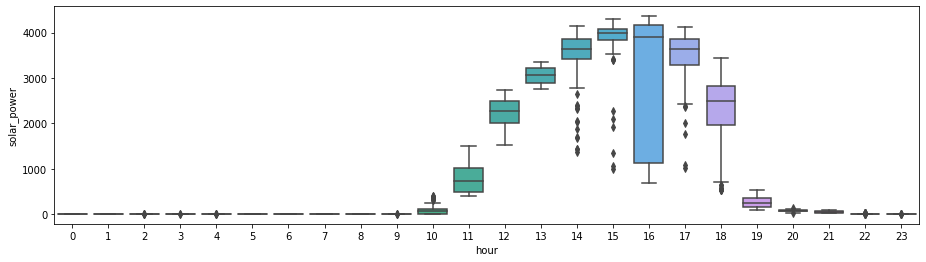

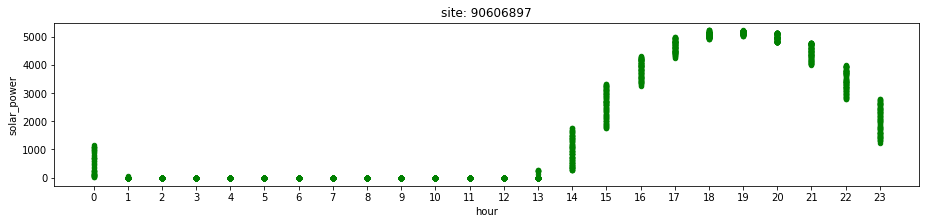

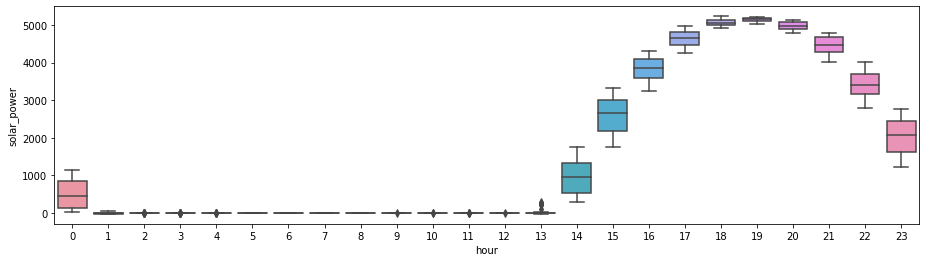

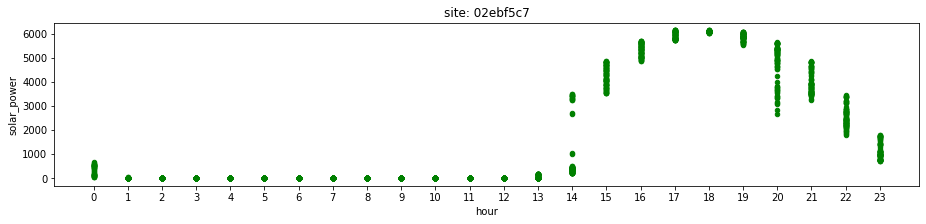

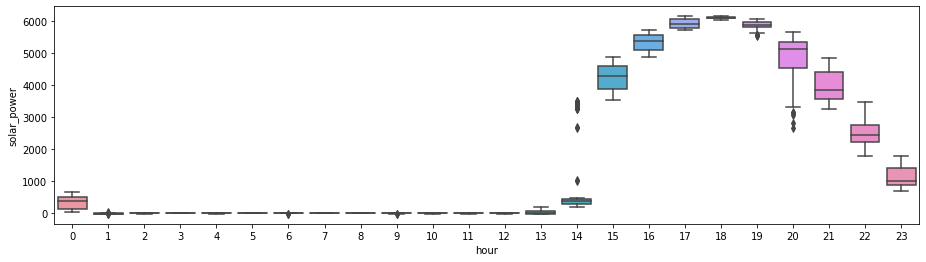

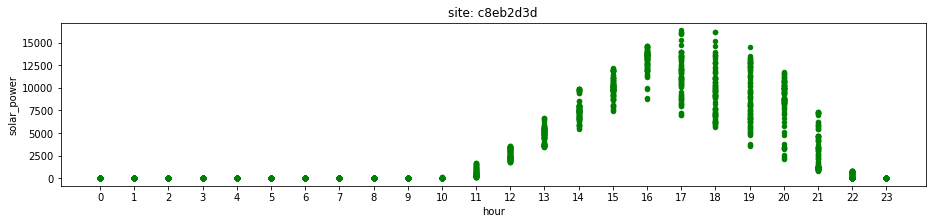

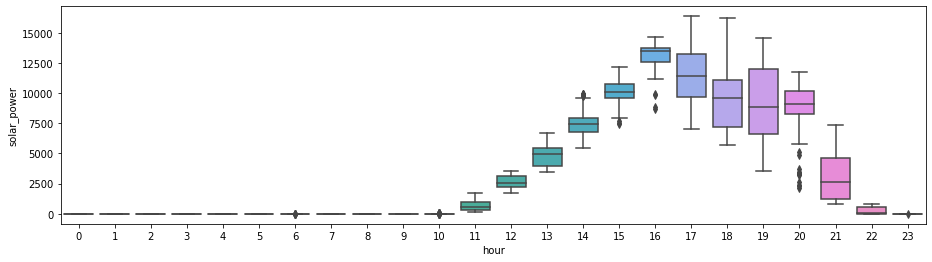

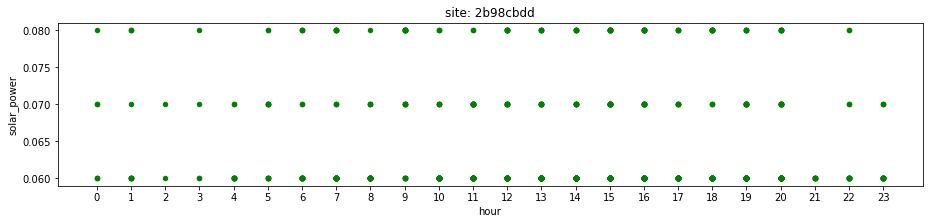

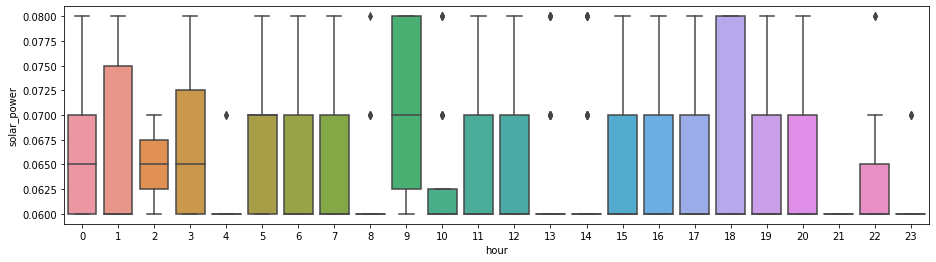

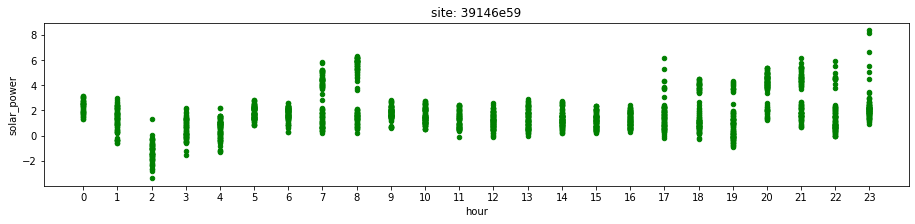

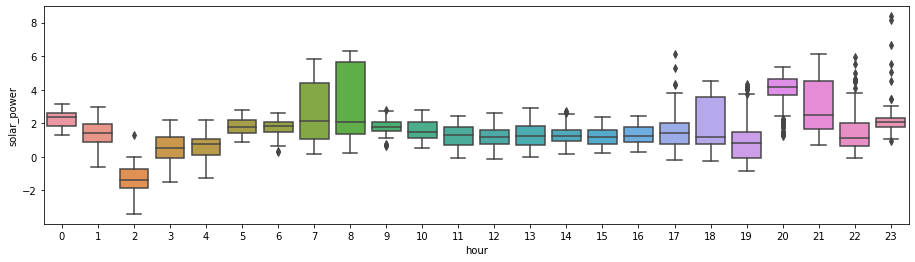

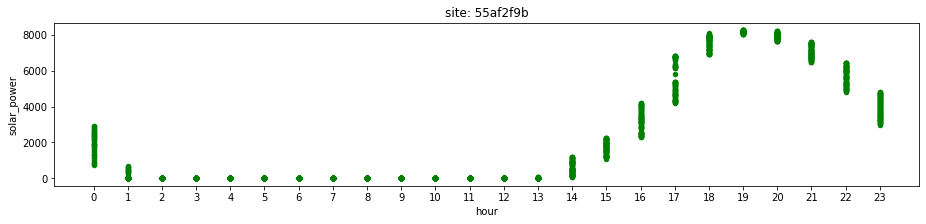

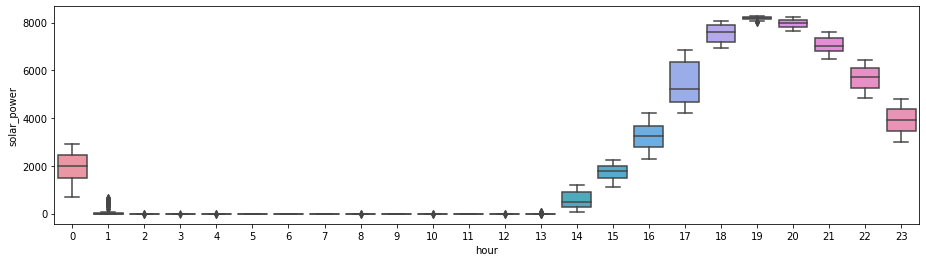

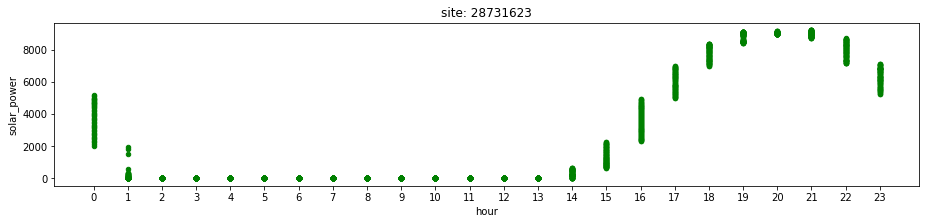

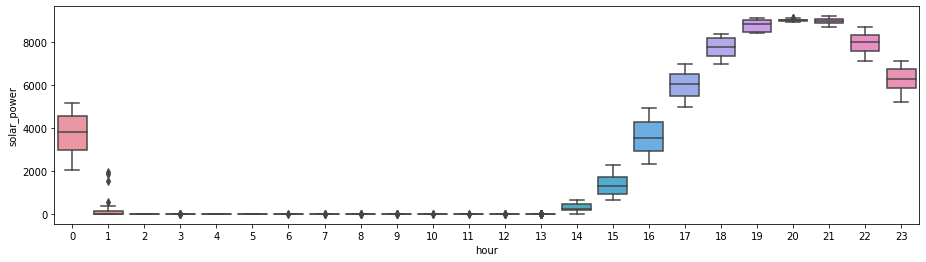

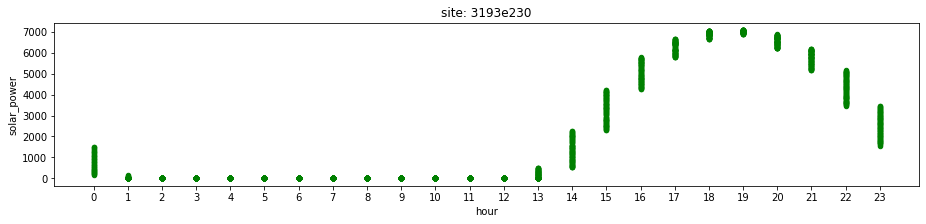

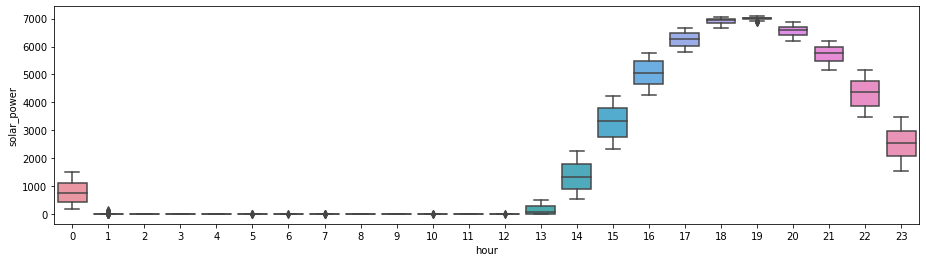

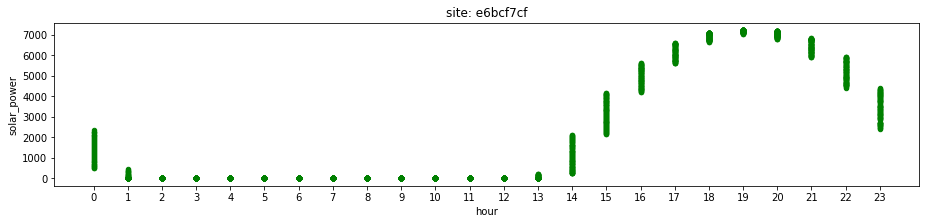

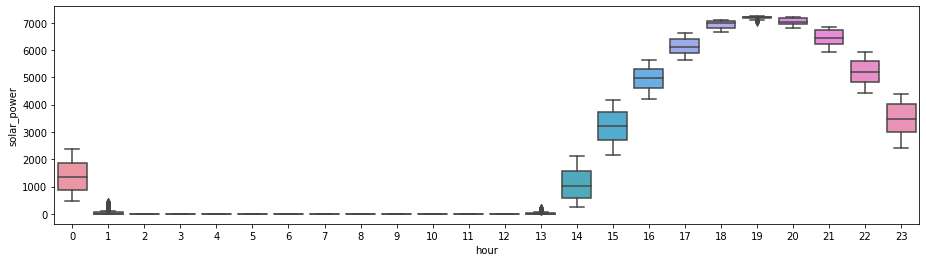

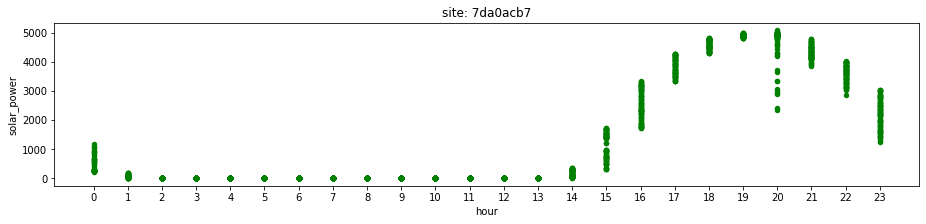

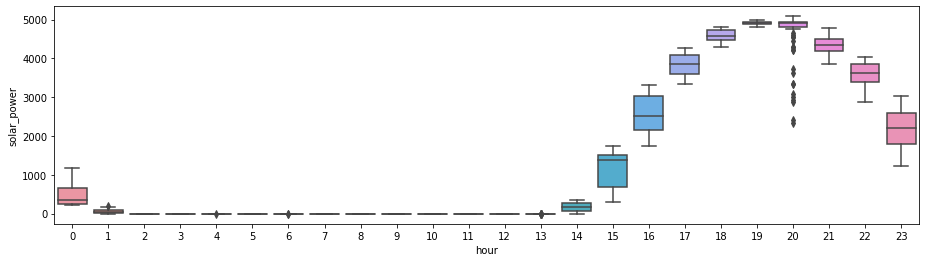

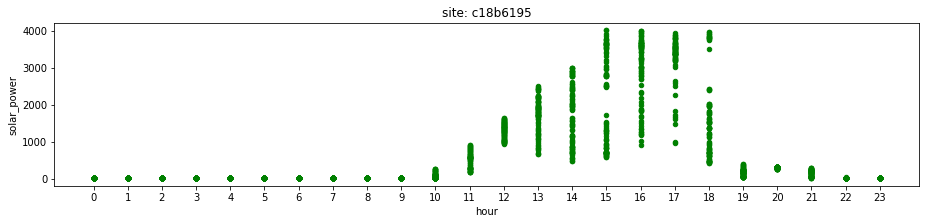

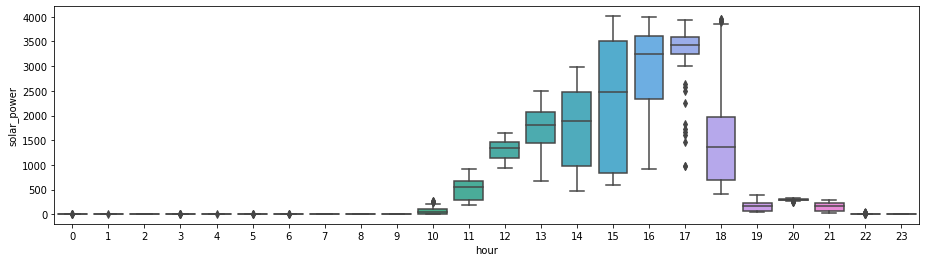

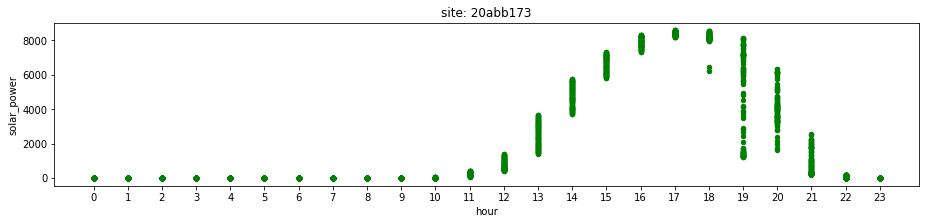

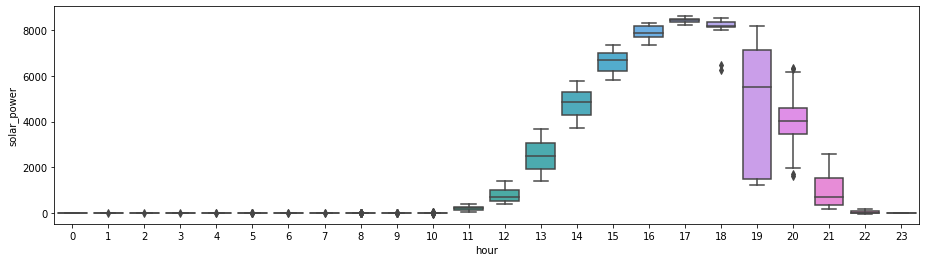

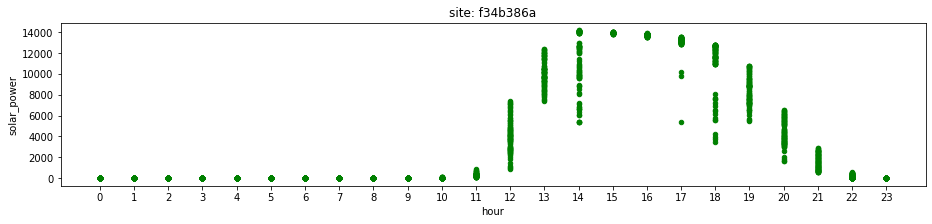

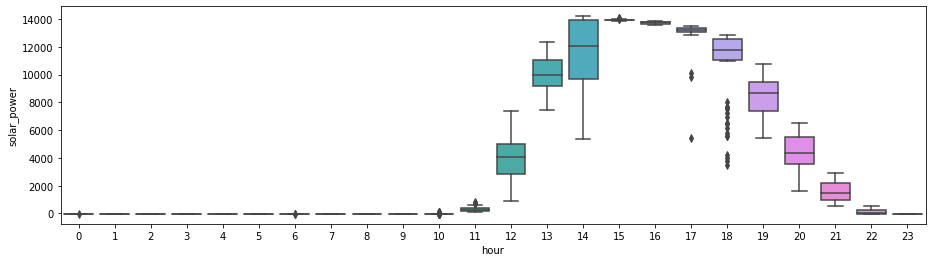

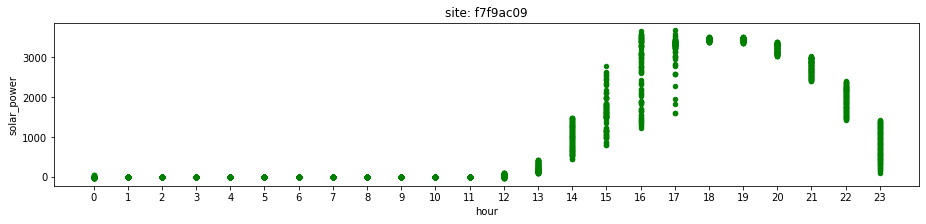

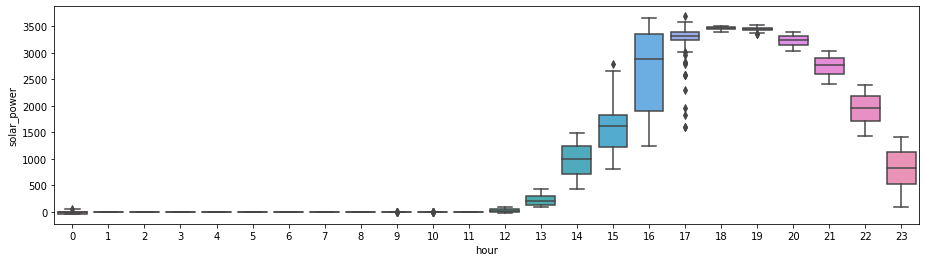

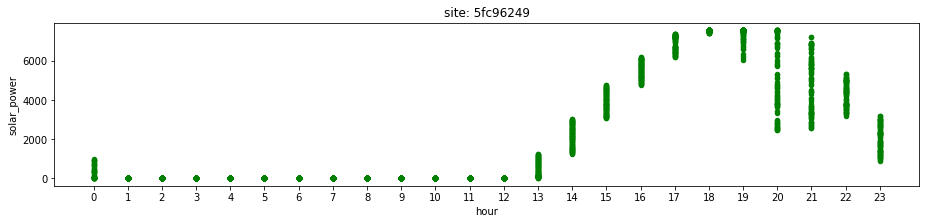

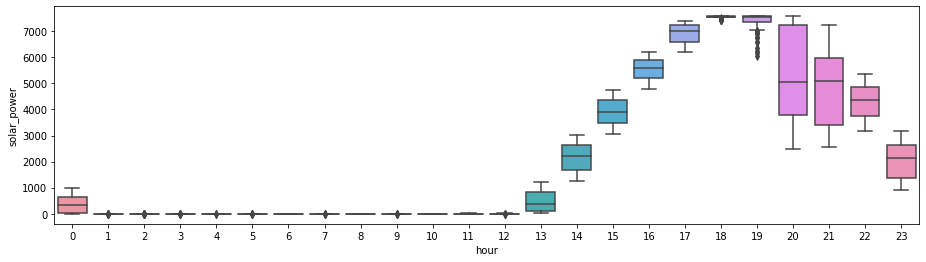

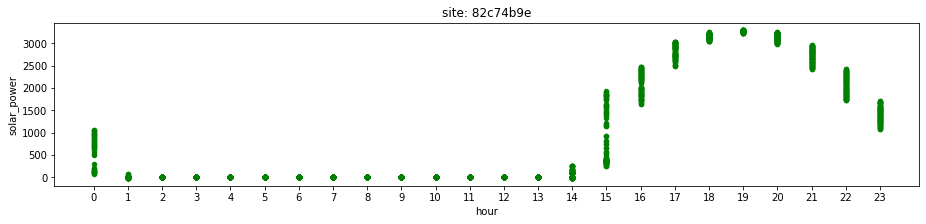

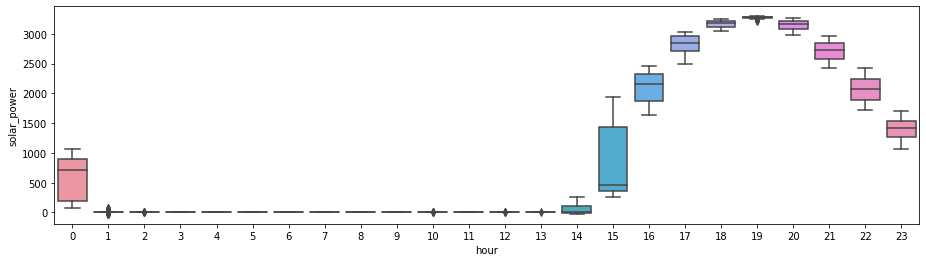

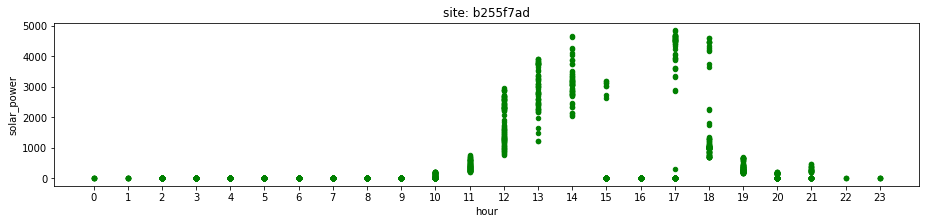

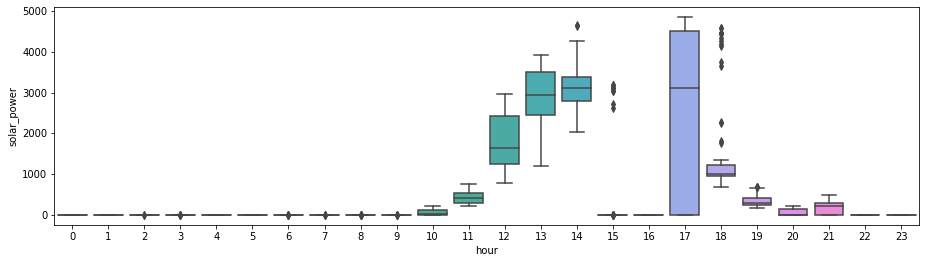

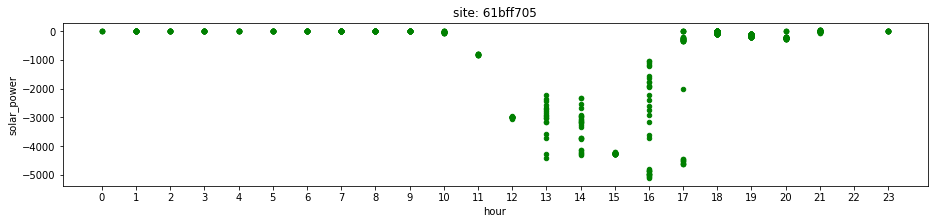

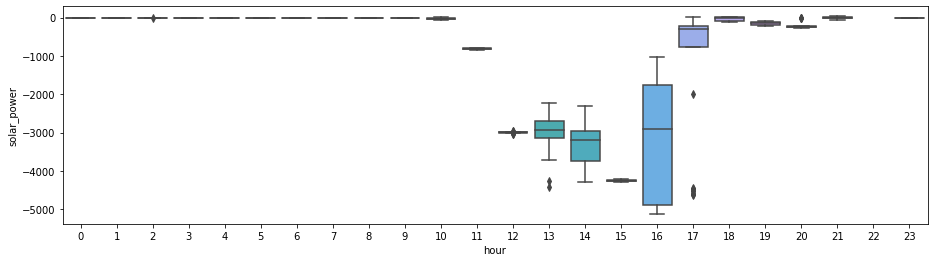

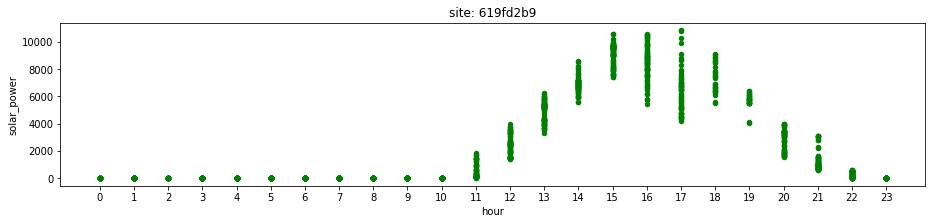

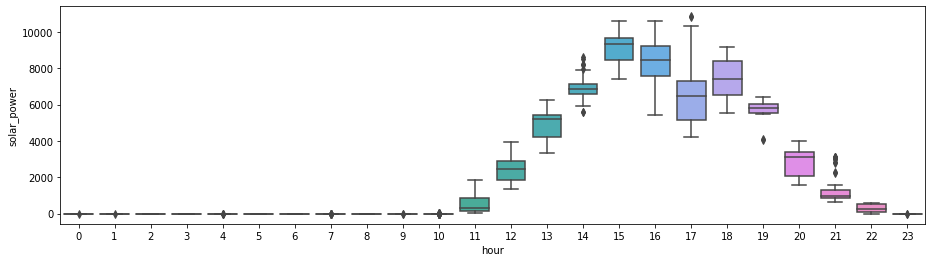

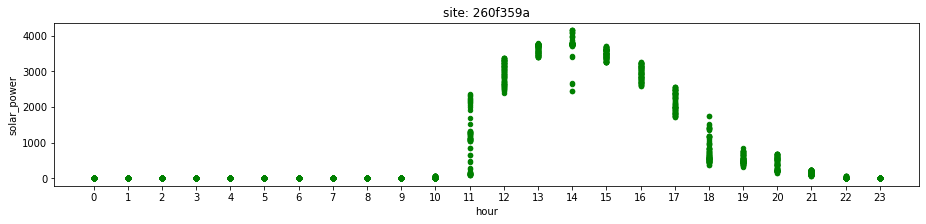

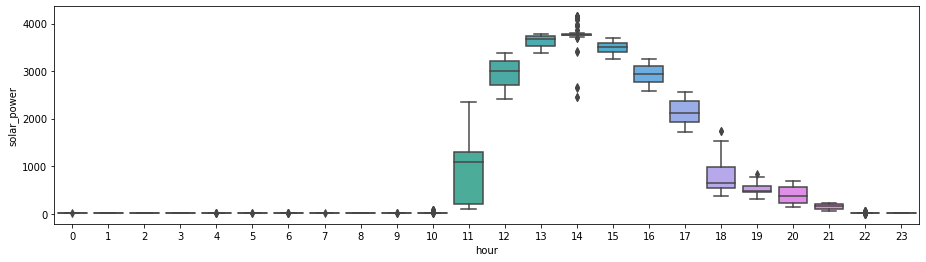

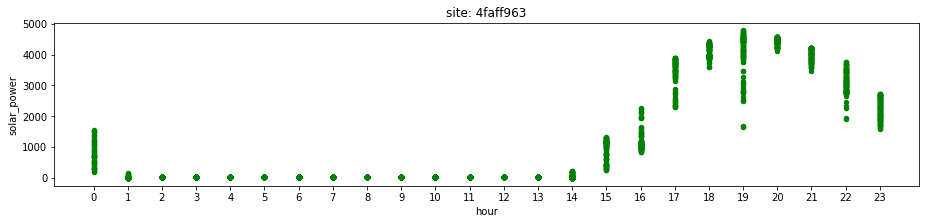

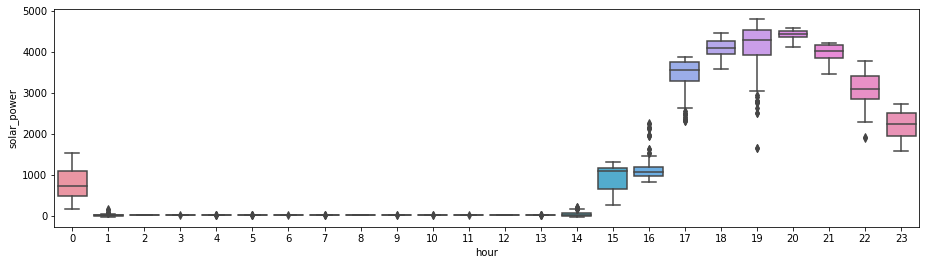

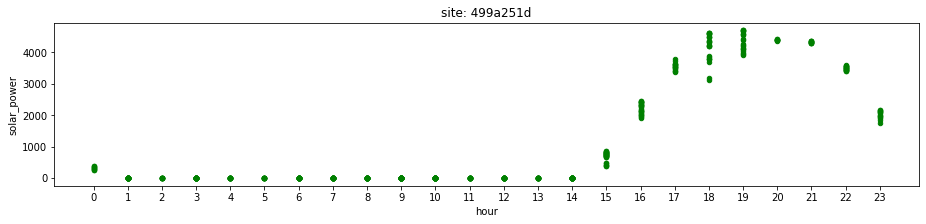

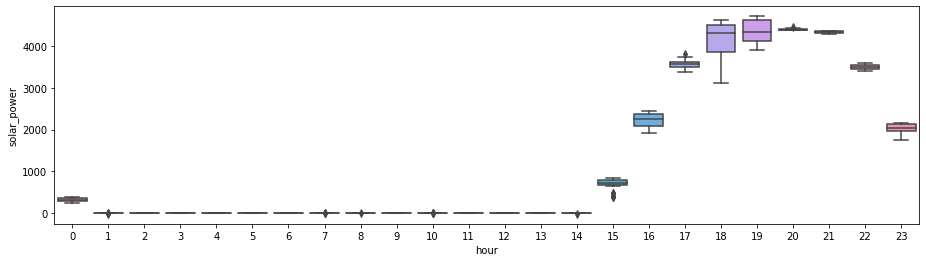

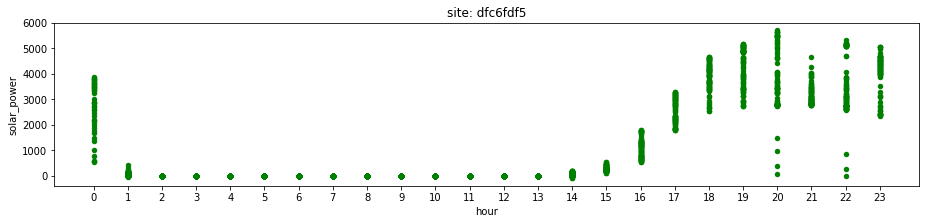

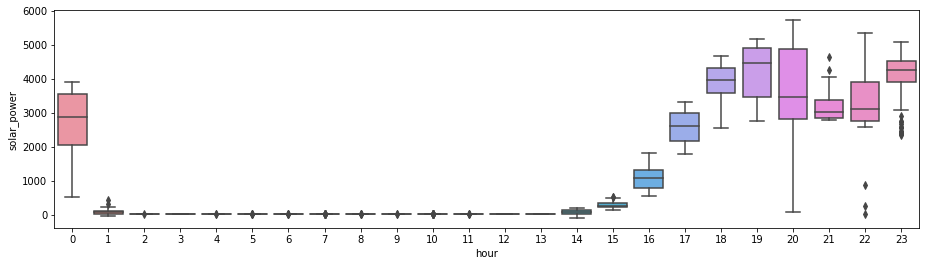

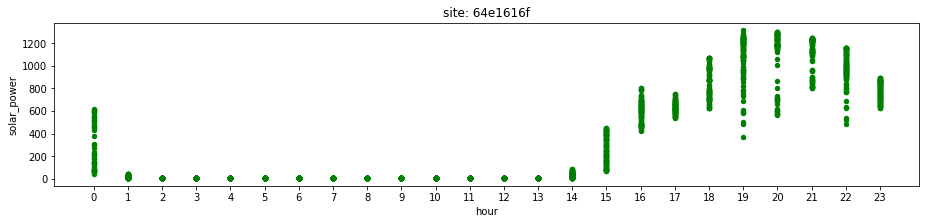

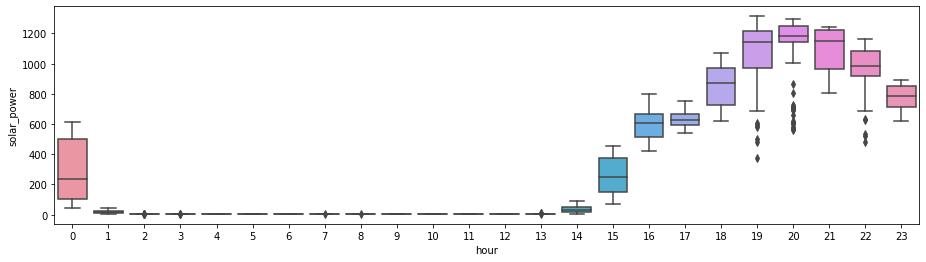

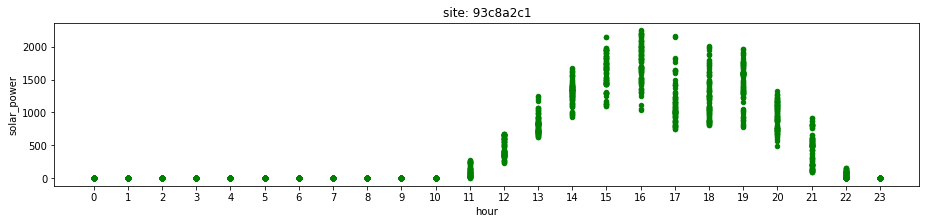

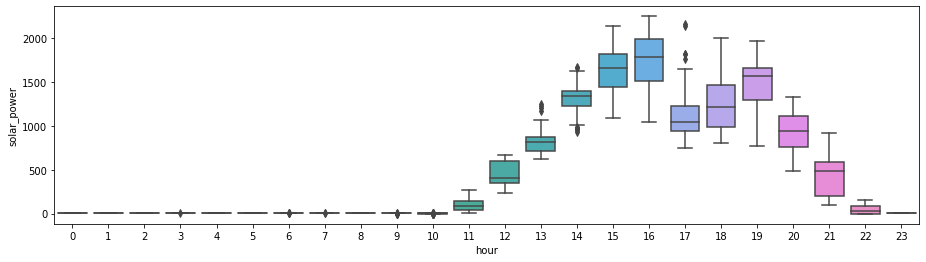

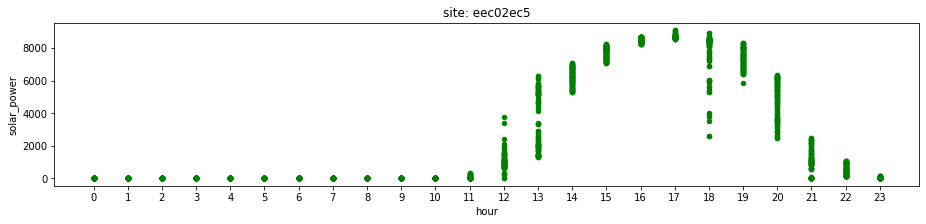

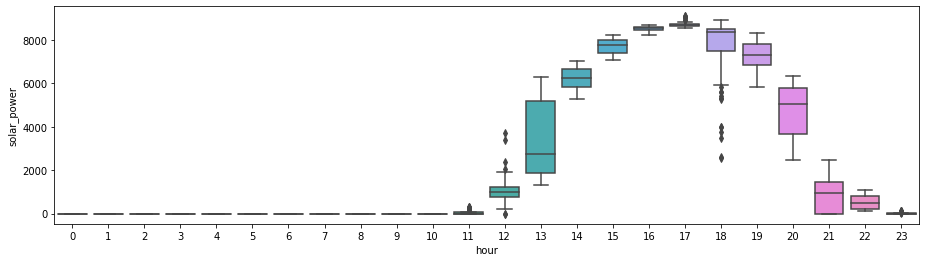

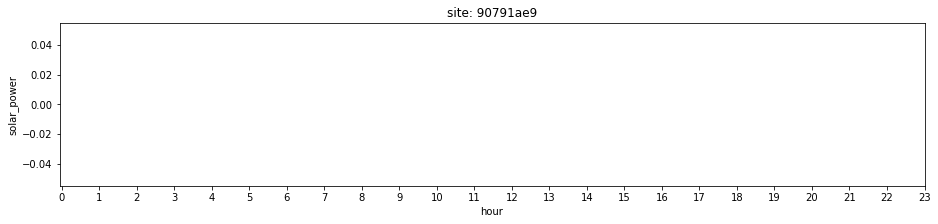

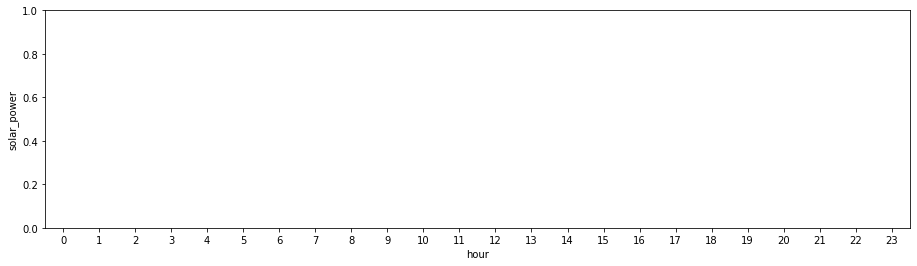

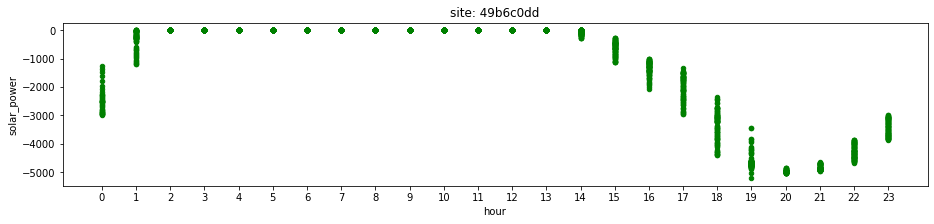

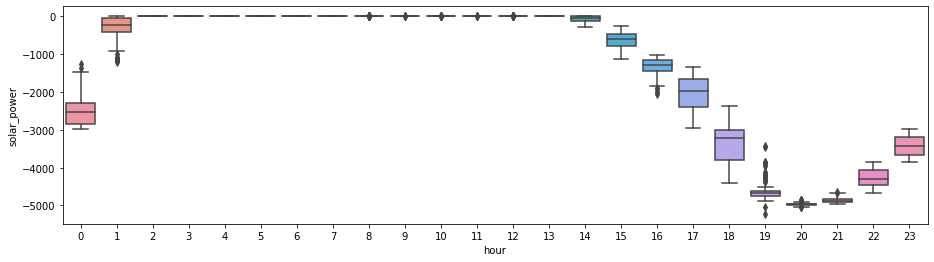

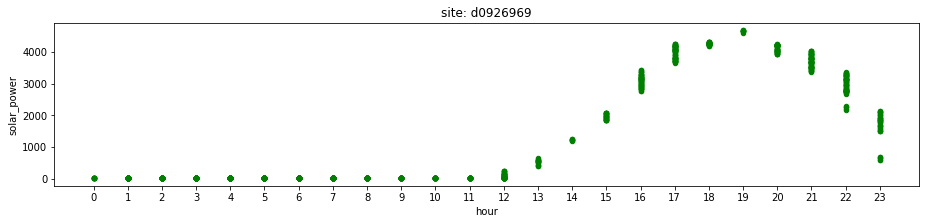

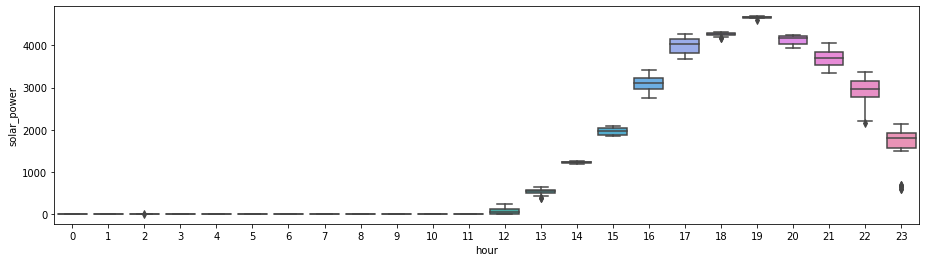

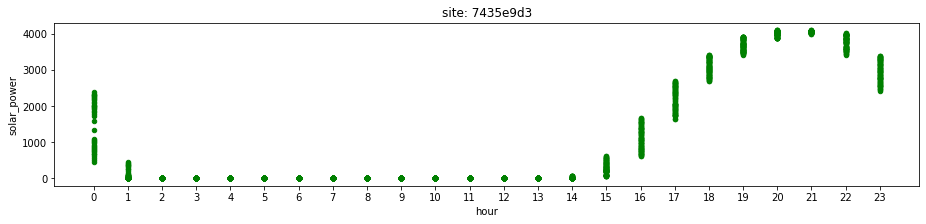

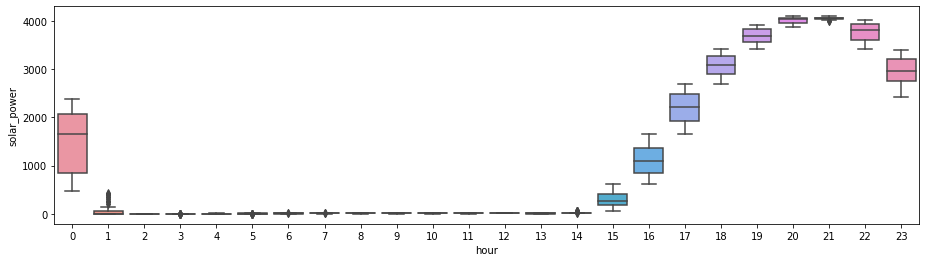

In [11]:
# plot the data
powers =["battery_power", "site_power", "solar_power"]
for s in sites:
    plot_scatter_chart(data, s, True, False, False)
    plot_box_plot(data, s)

    

/Users/davtung/miniconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


      hour  lower_quartile    median  upper_quartile      site
0        0       1948.6150  2241.150       2477.2700  134a3fa6
1        1         17.7200   106.530        428.7500  134a3fa6
2        2          6.0825     6.700          6.8725  134a3fa6
3        3          4.2400     7.440          7.6000  134a3fa6
4        4          7.3775     7.675          7.9375  134a3fa6
...    ...             ...       ...             ...       ...
1003    19       3561.9800  3688.200       3827.1200  7435e9d3
1004    20       3970.3650  4038.385       4065.1750  7435e9d3
1005    21       4044.5300  4060.530       4074.2100  7435e9d3
1006    22       3611.5300  3808.050       3945.6500  7435e9d3
1007    23       2754.3300  2957.040       3219.0100  7435e9d3

[1008 rows x 5 columns]
{'signals': {'SITE_SM_batteryInstPower': -988.333333333336, 'SITE_SM_siteInstPower': 487.67833404541335, 'SITE_SM_solarInstPower': 1037.6033284505208}, 'site': '134a3fa6', 'timestamp': 'Sun, 04 Jul 2021 17:24:34 GMT'}
{

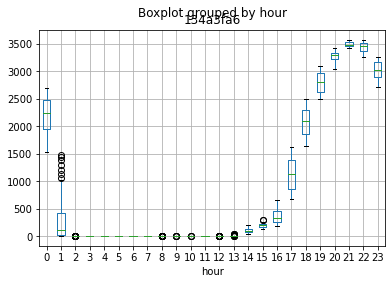

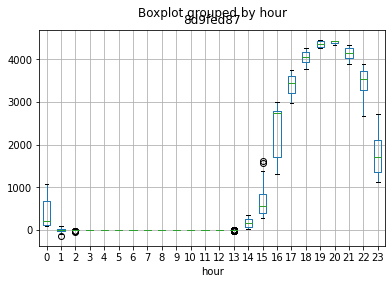

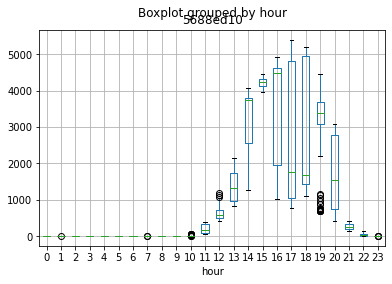

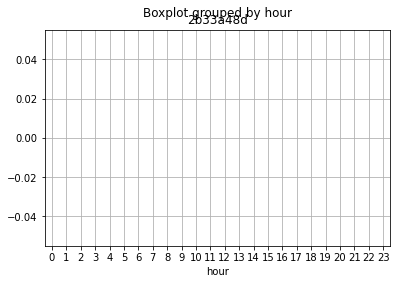

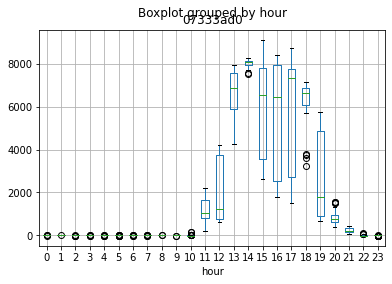

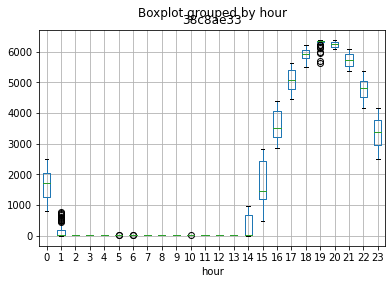

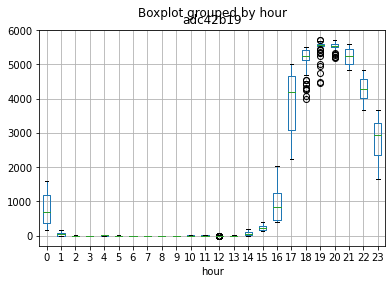

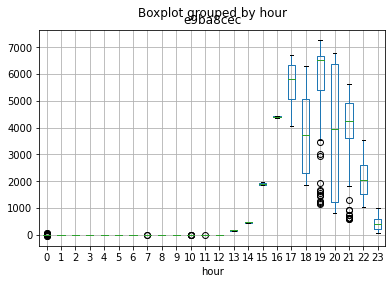

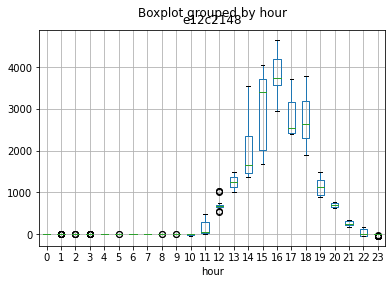

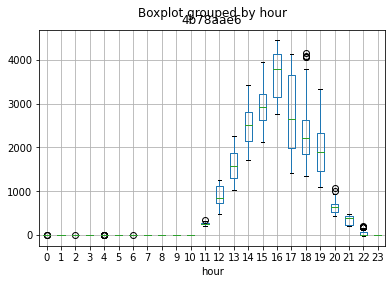

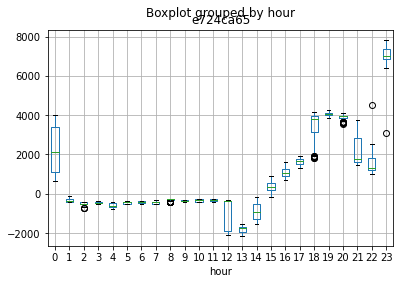

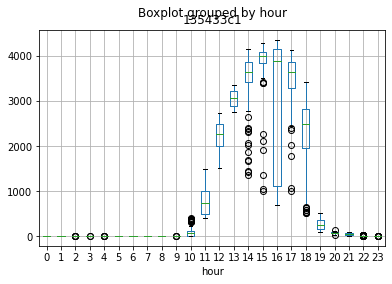

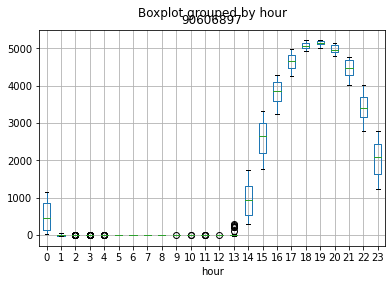

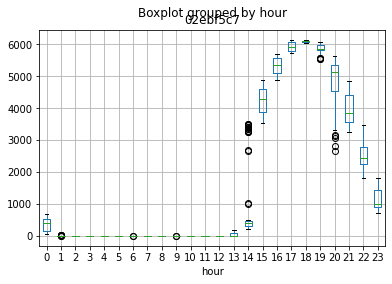

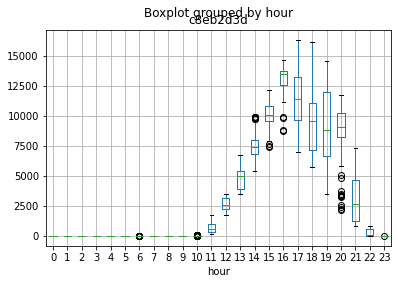

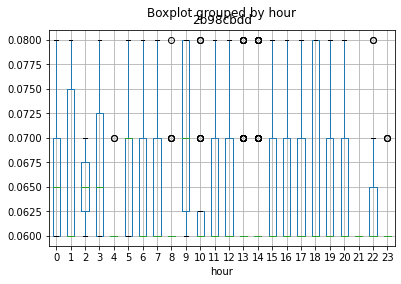

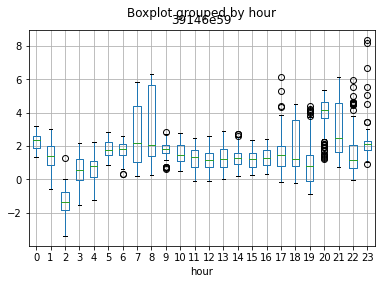

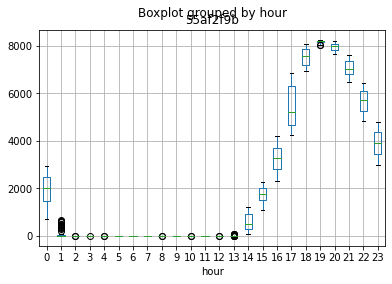

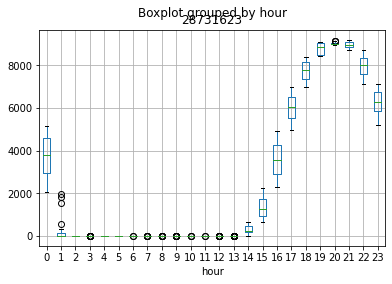

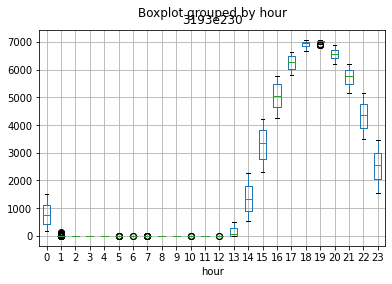

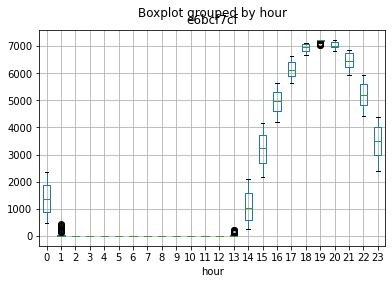

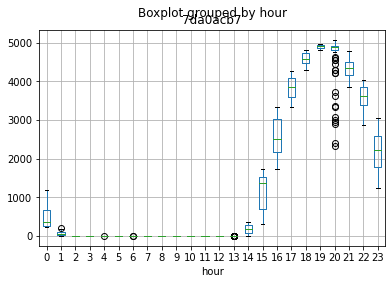

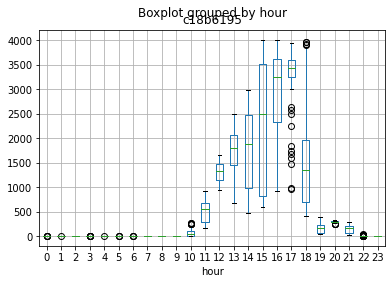

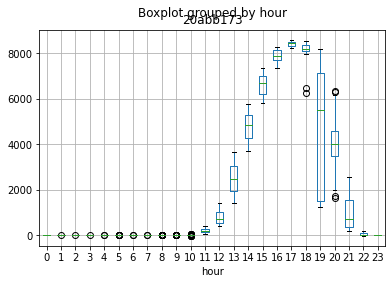

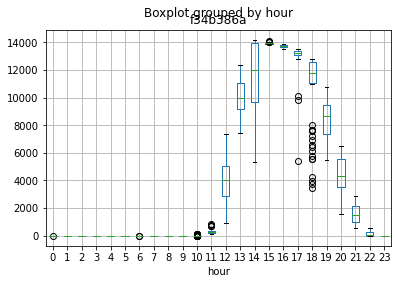

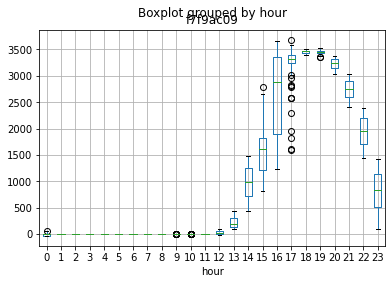

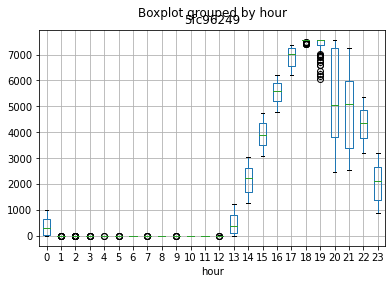

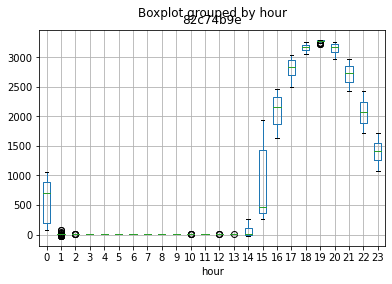

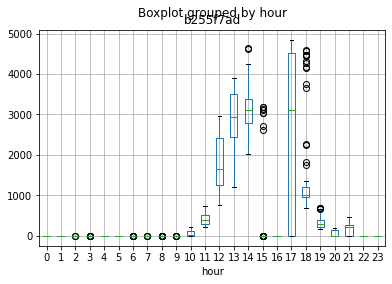

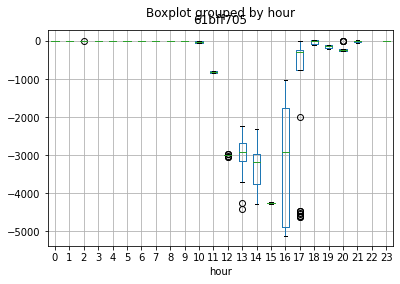

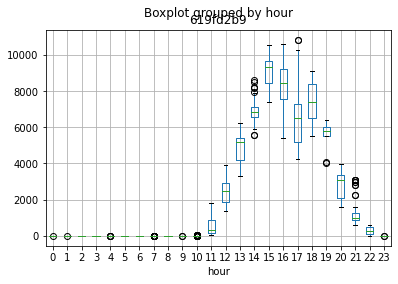

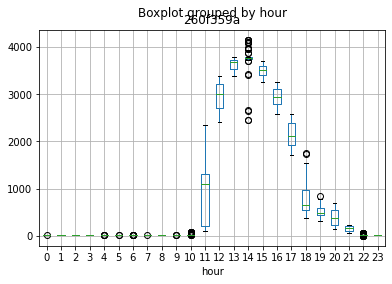

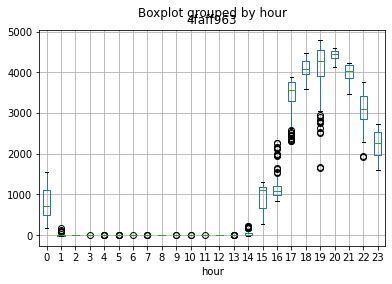

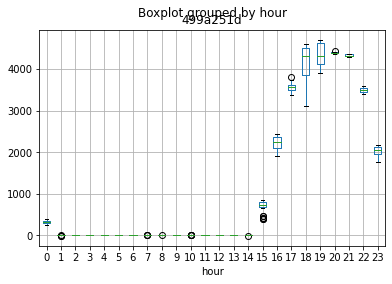

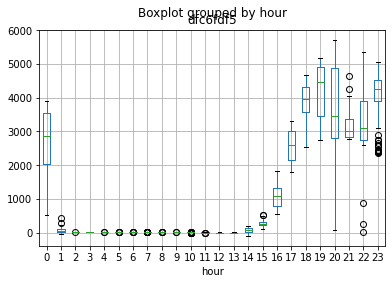

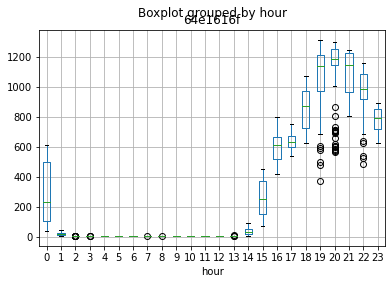

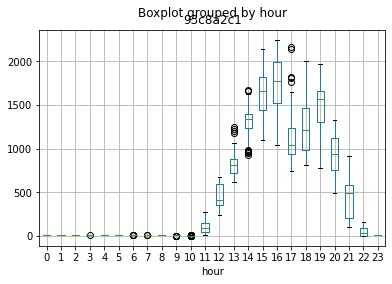

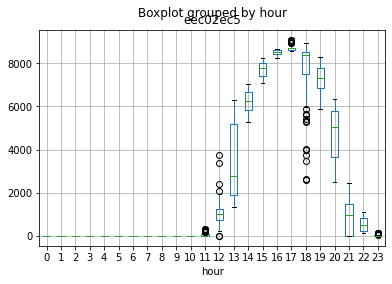

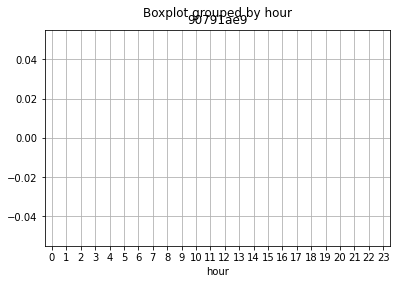

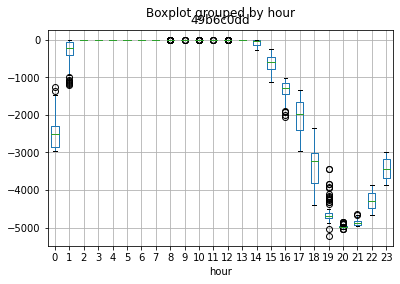

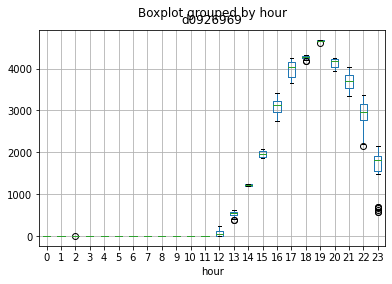

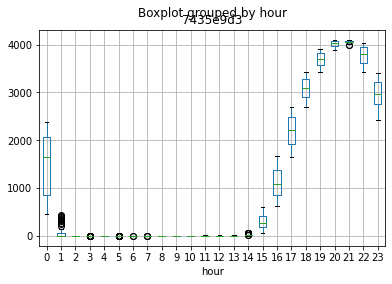

In [12]:
from data_injection import get_raw_data

bp_data = get_box_plot_data(data, sites)
print(bp_data)

new_df = get_raw_data()
new_df['hour'] = new_df['date'].astype('datetime64[ns]').dt.hour


merged = pd.merge( new_df, bp_data, on=['hour','site'], how = 'inner')

print(merged)



------- 134a3fa6
8.04
2236.18
------- 8d9fed87
0.0
3151.87
------- 5688ed10
6.44
1520.85
------- 2b33a48d
nan
nan
------- 07333ad0
-5.64
3774.1
------- 38c8ae33
21.37
4580.73
------- adc42b19
-2.55
3702.23
------- e9ba8cec
-3.21
3480.675
------- e12c2148
-1.23
327.66999999999996
------- 4b78aae6
0.66
2203.78
------- e724ca65
-430.73
1701.73
------- 135433c1
11.28
2264.09
------- 90606897
3.39
3844.04
------- 02ebf5c7
-0.16
4140.61
------- c8eb2d3d
-2.97
7415.45
------- 2b98cbdd
0.06
0.07
------- 39146e59
0.87
2.16
------- 55af2f9b
-5.63
4915.3099999999995
------- 28731623
4.057499999999999
6631.895
------- 3193e230
2.7675
5001.285
------- e6bcf7cf
2.65
5352.285
------- 7da0acb7
-3.37
3380.13
------- c18b6195
10.35
1028.9325000000001
------- 20abb173
-0.06
4219.0025
------- f34b386a
-12.1
9176.855
------- f7f9ac09
3.44
2427.18
------- 5fc96249
5.1775
4538.485000000001
------- 82c74b9e
9.0875
2242.45
------- b255f7ad
4.14
408.61
------- 61bff705
-262.1425
-2.72
------- 619fd2b9
-3.97
456